## Importing python  libraries

In [ ]:
 import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/week 5/train.csv',parse_dates = True, low_memory = False, index_col = 'Date')
test  = pd.read_csv('/content/drive/My Drive/week 5/test.csv')
store_set  = pd.read_csv('/content/drive/My Drive/week 5/store.csv')

## EDA














### EDA Part 1
This includes 


1.   Understanding the data
2.   Data features(data type)
1.   Statical summary
2.   Data quality checks
1.   Variable check
2.   Pipeline building to help clean data

This will be performed per data set


*   Train data
*   Test data
*   Store data

#### Train set



   **Short description:**

*Sales*: the turnover for any given day (target variable).

*Customers*: the number of customers on a given day.

*Open*: an indicator for whether the store was open: 0 = closed, 1 = open.

*Promo*: indicates whether a store is running a promo on that day.O means no promo,1 - there was promo

*StateHoliday*: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.

*SchoolHoliday*: indicates if the (Store, Date) was affected by the closure of schools.




In [ ]:
# data at a glance
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# finding the shape of our dataset
train.shape

(1017209, 9)

In [ ]:
# finding the size of our dataset
train.size

9154881

In [ ]:
# data types of each column in dataset
train_d = pd.DataFrame(train.dtypes,
                          columns=['Data Type'])
train_d

,Data Type
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


In [ ]:
# summary of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# finding the statical summary of our dataset
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
# calculating quartile and Inter quartile range
Q3 = train.quantile(0.75)
Q1 = train.quantile(0.25)
IQR = Q3 -Q1
IQR

Store             558.0
DayOfWeek           4.0
Sales            4129.0
Customers         432.0
Open                0.0
Promo               1.0
SchoolHoliday       0.0
dtype: float64

In [ ]:
# unique values in dataset
unique_values = pd.DataFrame(columns=['Unique Values'])
for x in list(train.columns.values):
    unique_values.loc[x] = [train[x].nunique()]
# sorting the values
unique_values = unique_values.sort_values(by='Unique Values', ascending=True)
unique_values

,Unique Values
Open,2
Promo,2
SchoolHoliday,2
StateHoliday,5
DayOfWeek,7
Date,942
Store,1115
Customers,4086
Sales,21734


In [ ]:
#  missing values in dataset
missing_data_counts = pd.DataFrame(train.isnull().sum(),
                                   columns=(['Missing Values']))
# sorting the missing_data_count
missing_data_counts = missing_data_counts.sort_values(by='Missing Values', ascending=True)
missing_data_counts

,Missing Values
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
#finding the present values count
present_data = pd.DataFrame(train.count(),
                                   columns=['Present Values'])
present_data

,Present Values
Store,1017209
DayOfWeek,1017209
Date,1017209
Sales,1017209
Customers,1017209
Open,1017209
Promo,1017209
StateHoliday,1017209
SchoolHoliday,1017209


In [ ]:
# categorical variables
non_numeric_data = train.select_dtypes(include=['object']).copy()
non_numeric_data

,Date,StateHoliday
0,2015-07-31,0
1,2015-07-31,0
2,2015-07-31,0
3,2015-07-31,0
4,2015-07-31,0
...,...,...
1017204,2013-01-01,a
1017205,2013-01-01,a
1017206,2013-01-01,a
1017207,2013-01-01,a


In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Date', 'StateHoliday']

In [ ]:
# numeric data types
numeric_data = train.select_dtypes(include=['int64']).copy()
numeric_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,5,5263,555,1,1,1
1,2,5,6064,625,1,1,1
2,3,5,8314,821,1,1,1
3,4,5,13995,1498,1,1,1
4,5,5,4822,559,1,1,1
...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1
1017205,1112,2,0,0,0,0,1
1017206,1113,2,0,0,0,0,1
1017207,1114,2,0,0,0,0,1


In [ ]:
numeric_cols = train.select_dtypes(include=['int64']).columns.tolist()
numeric_cols

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

#### Test data

**Store data description**

*Store*: a unique Id for each store

*StoreType*: differentiates between 4 different store models: a, b, c, d

*Assortment*: describes an assortment level: a = basic, b = extra, c = extended

*CompetitionDistance*: distance in meters to the nearest competitor store

*CompetitionOpenSince[Month/Year]*: gives the approximate year and month of the time the nearest competitor was opened

*Promo2*: it is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating

*Promo2Since[Year/Week*]: describes the year and calendar week when the store started participating in Promo2

*PromoInterval*: describes the consecutive intervals
Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



In [ ]:
# data at a glance
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
# data at a glance
test.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [ ]:
# finding the shape of our dataset
test.shape

(41088, 8)

In [ ]:
# finding the size of our dataset
test.size

328704

In [ ]:
# data types of each column in dataset
test_d = pd.DataFrame(test.dtypes,
                          columns=['Data Type'])
test_d

,Data Type
Id,int64
Store,int64
DayOfWeek,int64
Date,object
Open,float64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


In [ ]:
# summary of dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
# finding the statical summary of our dataset
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,41088.0,20544.500000,11861.228267,1.0,10272.75,20544.5,30816.25,41088.0
Store,41088.0,555.899533,320.274496,1.0,279.75,553.5,832.25,1115.0
DayOfWeek,41088.0,3.979167,2.015481,1.0,2.00,4.0,6.00,7.0
Open,41077.0,0.854322,0.352787,0.0,1.00,1.0,1.00,1.0
Promo,41088.0,0.395833,0.489035,0.0,0.00,0.0,1.00,1.0
SchoolHoliday,41088.0,0.443487,0.496802,0.0,0.00,0.0,1.00,1.0


In [ ]:
# calculating quartile and Inter quartile range
Q3 = test.quantile(0.75)
Q1 = test.quantile(0.25)
IQR = Q3 -Q1
IQR

Id               20543.5
Store              552.5
DayOfWeek            4.0
Open                 0.0
Promo                1.0
SchoolHoliday        1.0
dtype: float64

In [ ]:
# unique values in dataset
unique_values = pd.DataFrame(columns=['Unique Values'])
for x in list(test.columns.values):
    unique_values.loc[x] = [test[x].nunique()]
# sorting the values
unique_values = unique_values.sort_values(by='Unique Values', ascending=True)
unique_values

,Unique Values
Open,2
Promo,2
StateHoliday,2
SchoolHoliday,2
DayOfWeek,7
Date,48
Store,856
Id,41088


In [ ]:
#  missing values in dataset
missing_data_counts = pd.DataFrame(test.isnull().sum(),
                                   columns=(['Missing Values']))
# sorting the missing_data_count
missing_data_counts = missing_data_counts.sort_values(by='Missing Values', ascending=True)
missing_data_counts

,Missing Values
Id,0
Store,0
DayOfWeek,0
Date,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Open,11


In [ ]:
present_data = pd.DataFrame(test.count(),
                                   columns=['Present Values'])
present_data

,Present Values
Id,41088
Store,41088
DayOfWeek,41088
Date,41088
Open,41077
Promo,41088
StateHoliday,41088
SchoolHoliday,41088


In [ ]:
# categorical variables
non_numeric_data = test.select_dtypes(include=['object']).copy()
non_numeric_data

,Date,StateHoliday
0,2015-09-17,0
1,2015-09-17,0
2,2015-09-17,0
3,2015-09-17,0
4,2015-09-17,0
...,...,...
41083,2015-08-01,0
41084,2015-08-01,0
41085,2015-08-01,0
41086,2015-08-01,0


In [ ]:
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Date', 'StateHoliday']

In [ ]:
# numeric data types
numeric_data = train.select_dtypes(include=['int64']).copy()
numeric_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,5,5263,555,1,1,1
1,2,5,6064,625,1,1,1
2,3,5,8314,821,1,1,1
3,4,5,13995,1498,1,1,1
4,5,5,4822,559,1,1,1
...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1
1017205,1112,2,0,0,0,0,1
1017206,1113,2,0,0,0,0,1
1017207,1114,2,0,0,0,0,1


In [ ]:
numeric_cols = train.select_dtypes(include=['int64']).columns.tolist()
numeric_cols

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

#### Store data

In [ ]:
# data at a glance
store_set.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_set.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store_set.shape

(1115, 10)

In [ ]:
store_set.size

11150

In [ ]:
# data types of each column in dataset
test_d = pd.DataFrame(store_set.dtypes,
                          columns=['Data Type'])
test_d

,Data Type
Store,int64
StoreType,object
Assortment,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
PromoInterval,object


In [ ]:
# summary of dataset
store_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# finding the statical summary of our dataset
store_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [ ]:
# calculating quartile and Inter quartile range
Q3 = store_set.quantile(0.75)
Q1 = store_set.quantile(0.25)
IQR = Q3 -Q1
IQR

Store                         557.0
CompetitionDistance          6165.0
CompetitionOpenSinceMonth       6.0
CompetitionOpenSinceYear        7.0
Promo2                          1.0
Promo2SinceWeek                24.0
Promo2SinceYear                 2.0
dtype: float64

In [ ]:
# unique values in dataset
unique_values = pd.DataFrame(columns=['Unique Values'])
for x in list(store_set.columns.values):
    unique_values.loc[x] = [store_set[x].nunique()]
# sorting the values
unique_values = unique_values.sort_values(by='Unique Values', ascending=True)
unique_values

,Unique Values
Promo2,2
Assortment,3
PromoInterval,3
StoreType,4
Promo2SinceYear,7
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2SinceWeek,24
CompetitionDistance,654
Store,1115


In [ ]:
#  missing values in dataset
missing_data_counts = pd.DataFrame(store_set.isnull().sum(),
                                   columns=(['Missing Values']))
# sorting the missing_data_count
missing_data_counts = missing_data_counts.sort_values(by='Missing Values', ascending=True)
missing_data_counts

,Missing Values
Store,0
StoreType,0
Assortment,0
Promo2,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
# replace NA's by 0
store_set.fillna(0, inplace = True)

In [ ]:
#  check if the missing values in dataset have been replaced
missing_data_counts = pd.DataFrame(store_set.isnull().sum(),
                                   columns=(['Missing Values']))
# sorting the missing_data_count
missing_data_counts = missing_data_counts.sort_values(by='Missing Values', ascending=True)
missing_data_counts

,Missing Values
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [ ]:
present_data = pd.DataFrame(store_set.count(),
                                   columns=['Present Values'])
present_data

,Present Values
Store,1115
StoreType,1115
Assortment,1115
CompetitionDistance,1112
CompetitionOpenSinceMonth,761
CompetitionOpenSinceYear,761
Promo2,1115
Promo2SinceWeek,571
Promo2SinceYear,571
PromoInterval,571


In [ ]:
# categorical variables
non_numeric_data = store_set.select_dtypes(include=['object']).copy()
non_numeric_data

,StoreType,Assortment,PromoInterval
0,c,a,NaN
1,a,a,"Jan,Apr,Jul,Oct"
2,a,a,"Jan,Apr,Jul,Oct"
3,c,c,NaN
4,a,a,NaN
...,...,...,...
1110,a,a,"Jan,Apr,Jul,Oct"
1111,c,c,NaN
1112,a,c,NaN
1113,a,c,NaN


In [ ]:
categorical_cols = store_set.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['StoreType', 'Assortment', 'PromoInterval']

In [ ]:
numeric_data = store_set.select_dtypes(exclude=['object']).copy()
numeric_data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,570.0,11.0,2007.0,1,13.0,2010.0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,620.0,9.0,2009.0,0,NaN,NaN
4,5,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0
1111,1112,1880.0,4.0,2006.0,0,NaN,NaN
1112,1113,9260.0,NaN,NaN,0,NaN,NaN
1113,1114,870.0,NaN,NaN,0,NaN,NaN


In [ ]:
numeric_cols = store_set.select_dtypes(exclude=['object']).columns.tolist()
numeric_cols

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

### EDA Part 2 -Exploring different data features and making conclusions at large

In [ ]:
train_set = pd.merge(train, store_set, how = 'inner', on = 'Store')
test_set =  pd.merge(test, store_set, how = 'inner', on = 'Store')

In [ ]:
# time series as indexes
train.index

RangeIndex(start=0, stop=1017209, step=1)

In [ ]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# extracting  new variable
train['SalePerCustomer'] = train['Sales'] /train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

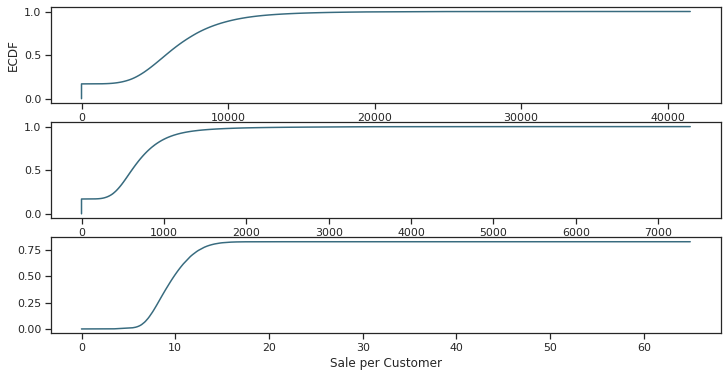

In [ ]:
#To get the first impression about continious variables in the data we can plot ECDF.

sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

About 25% of data has zero amount of sales / customers that we need to deal with and almost 80% of time daily amount of sales was less than 1000. So what about zero sales, is it only due to the fact that the store is closed?

In [ ]:
#Closed stores with zero sales 
# closed stores
null_stores = train[(train.Open == 0) & (train.Sales == 0)]
null_stores['Store'].count()

96511898

Thereare 172817 closed stores in the data. It is about 17% of the total amount of observations.
 
 To avoid any biased forecasts we will drop these values.

In [ ]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
zero_sales.shape

(54, 13)

In [ ]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)


Seasonality

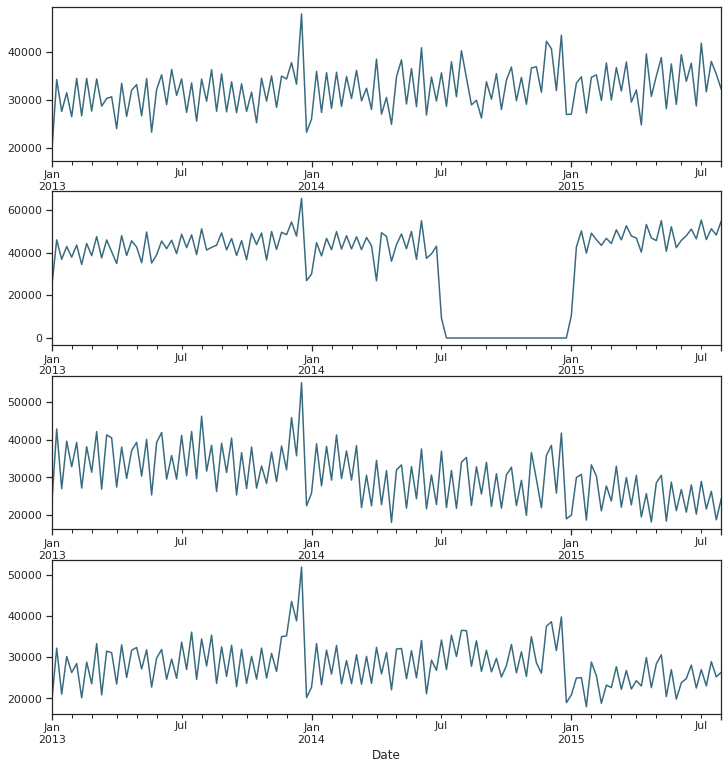

In [ ]:
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 10]['Sales']
sales_b = train[train.Store == 20]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 30]['Sales']
sales_d = train[train.Store == 40]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

Retail sales for StoreType A and C tend to peak for the Christmas season and then decline after the holidays. We might have seen the same trend for StoreType D (at the bottom) but there is no information from July 2014 to January 2015 about these stores as they were closed.

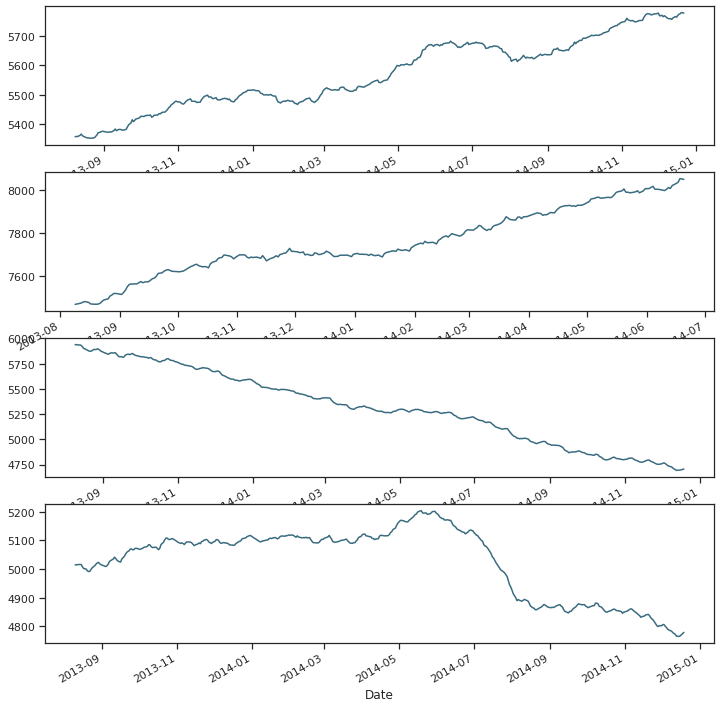

In [ ]:
#The next thing to check the presence of a trend in series.

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', freq = 365)
decomposition_d.trend.plot(color = c, ax = ax4)

Sales seems to increase, however not for the StoreType C (a third from the top). Eventhough the StoreType A is the most selling store type in the dataset

In [ ]:
# importing data
train1 = pd.read_csv('/content/drive/My Drive/week 5/train.csv')

# remove closed stores and those with no sales
train1= train1[(train1["Open"] != 0) & (train1['Sales'] != 0)]


# sales for the store number 1 (StoreType C)
time_series = train1[train1.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
time_series= time_series.sort_index(ascending = False)

# to datetime64
time_series['Date'] = pd.DatetimeIndex(time_series['Date'])
time_series.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

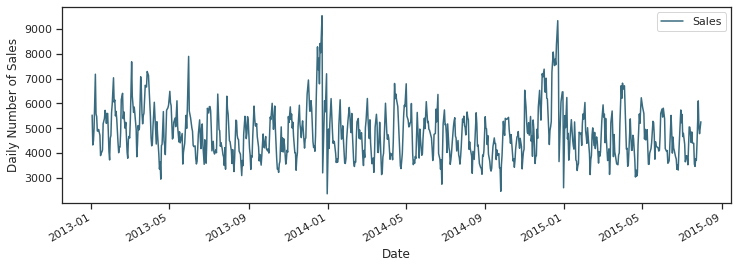

In [ ]:
# plot daily sales
ax = time_series.set_index('Date').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

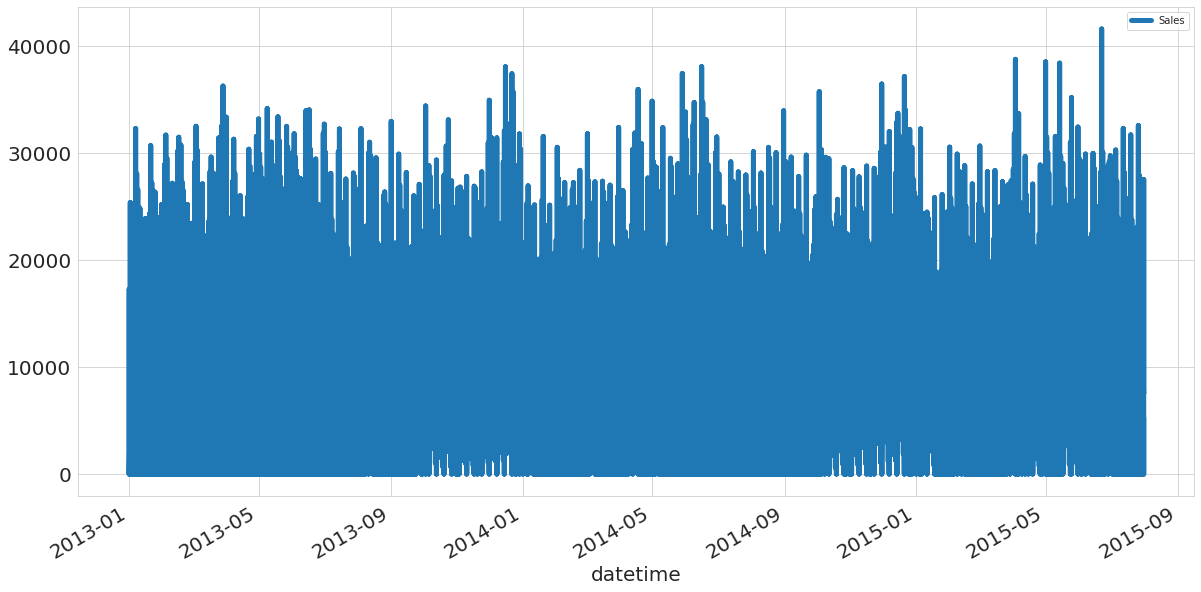

In [ ]:
# sales not converted to a float
time_series.plot(figsize =(20,10),linewidth =5,fontsize = 20)
plt.xlabel('datetime',fontsize = 20);

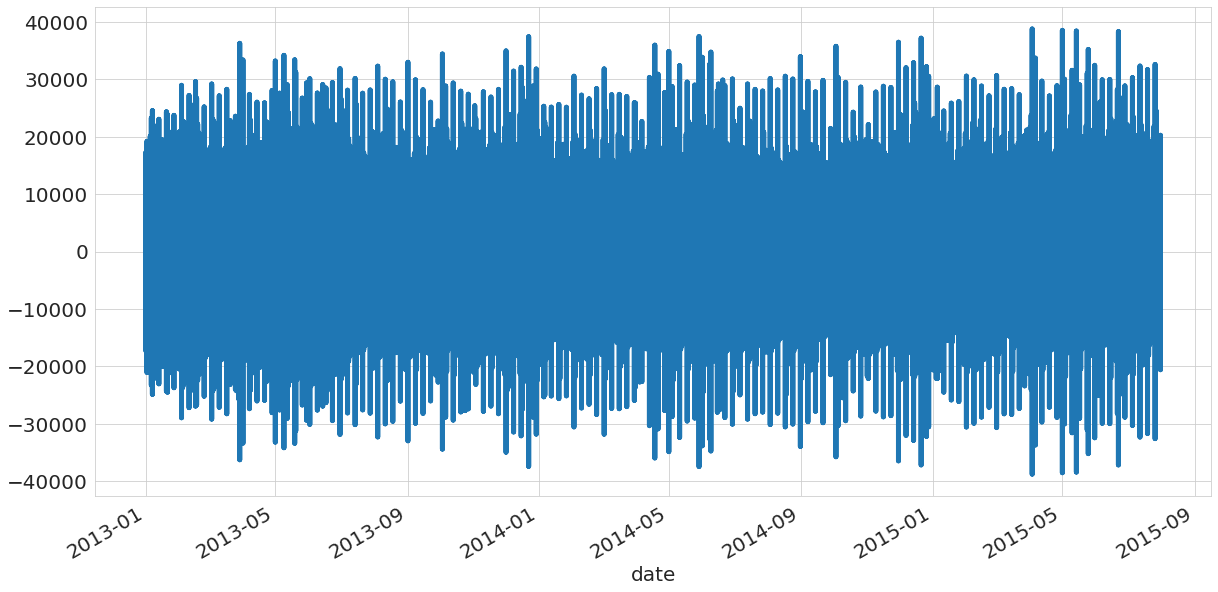

In [ ]:
sales = time_series['Sales']
sales.diff().plot(figsize = (20,10),linewidth = 5, fontsize = 20)
plt.xlabel('date',fontsize = 20);

 Holiday

In [ ]:
train_set = pd.merge(train,store_set, on ='Store')

In [ ]:
train['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [ ]:
train['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

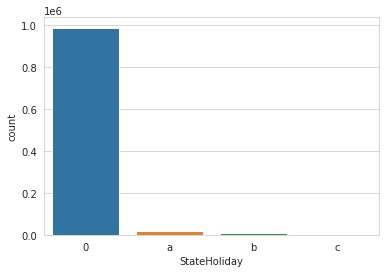

In [ ]:
# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
train["StateHoliday"].loc[train["StateHoliday"] == 0] = "0"

# Plot
sns.countplot(x='StateHoliday', data=train)


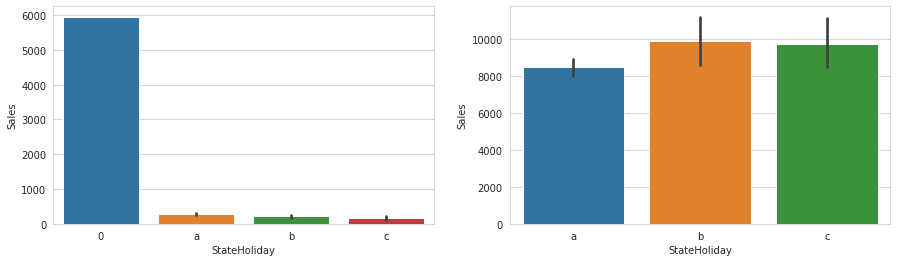

In [ ]:
# Before Holiday
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StateHoliday', y='Sales', data=train, ax=axis1)

# During 
mask = (train["StateHoliday"] != "0") & (train["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train[mask], ax=axis2)

First graph compares sales when there is a holiday and no holiday and we can see when before there is a holiday the sales are pretty high 

During State Holiday,Sales are pretty higher than a normal working day.This may be attributed to most customers being around and hence finding time to visit the stores and make purchases

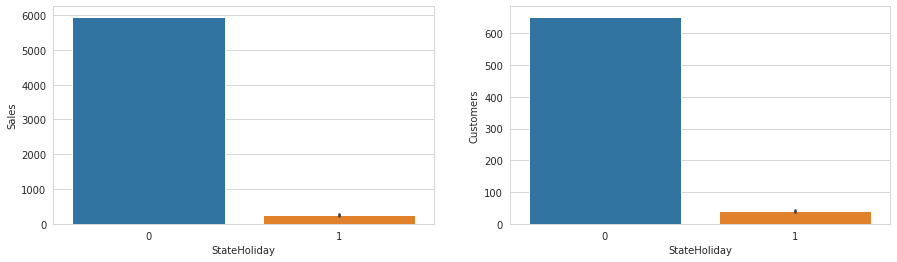

In [ ]:

# After
train["StateHoliday"] = train["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test["StateHoliday"]  = test["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=train, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=train, ax=axis2)

After State Holiday the sales are high and customers also are many.This can be attributed to most shops being closed during state holiday

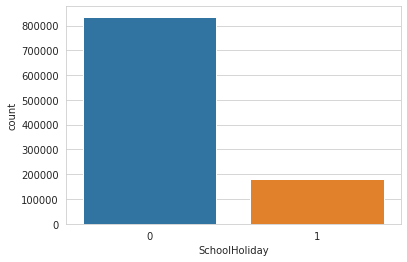

In [ ]:
# SchoolHoliday

# Plot
sns.countplot(x='SchoolHoliday', data= train)


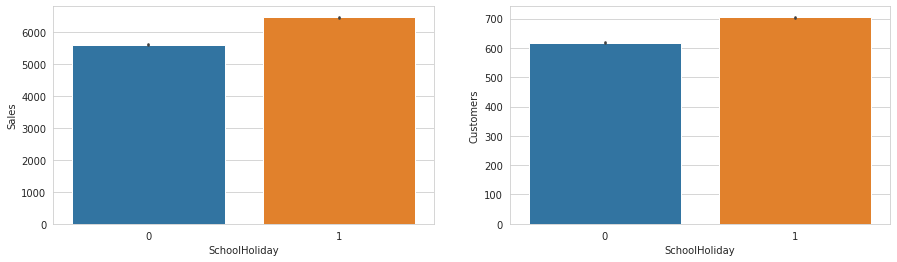

In [ ]:

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data= train, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data= train, ax=axis2)

As you can see ,when there is schools are closed ,there are more sale and customers ,this is attributed to school going children being home and likely to fall sick.

Correlation

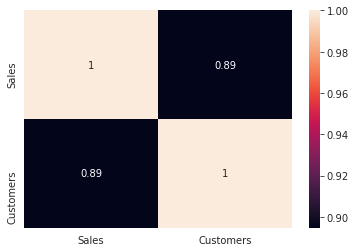

In [ ]:
#using heatmap to visualize correlation
ax = sns.heatmap(train[['Sales', 'Customers']].corr(), annot=True)
plt.savefig("correlation.png")
plt.show()

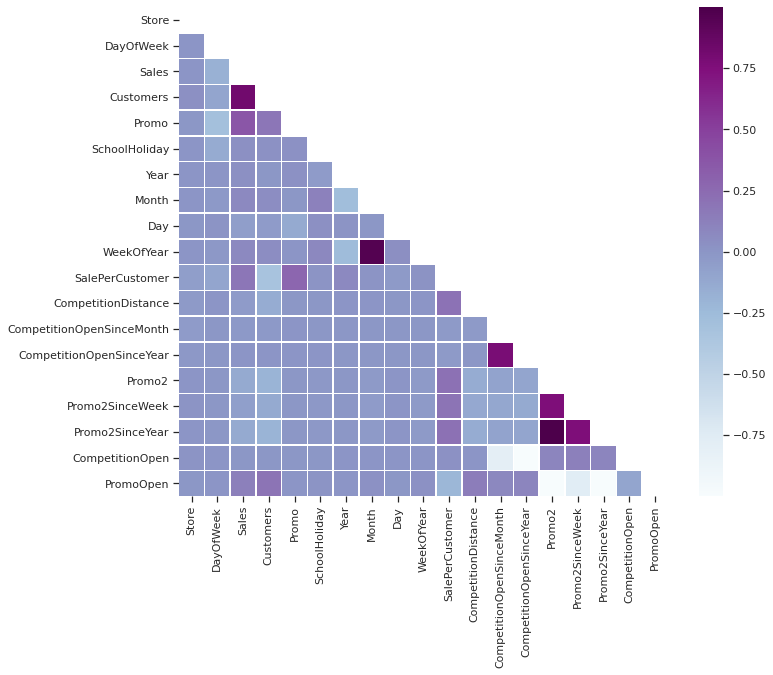

In [ ]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train_set.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

As you can see ,Sales and customers are highly correlated with a positive value 0f 0.89 that almost next to 1.Meaning for sales to be high,customers have to buy the Rossmann Pharmaceutical products.

To check for the customer behavior when the store is open and closed we going to compare the stream of customers and sales vs day of the week.

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

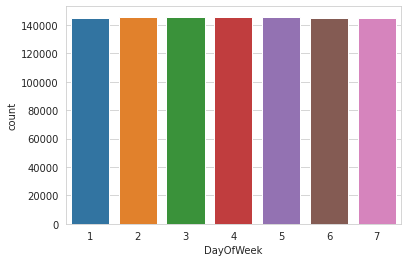

In [ ]:
# plotting days of the week
sns.countplot(x='DayOfWeek', data=train, order=[1,2,3,4,5,6,7])
train.columns

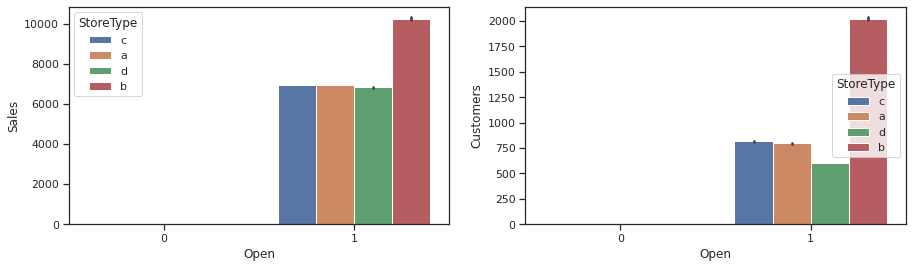

In [ ]:
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Open', y='Sales',hue='StoreType',data=train_set,order =[0,1], ax=axis1)
sns.barplot(x='Open', y='Customers',hue='StoreType',data=train_set, order=[0,1], ax=axis2)

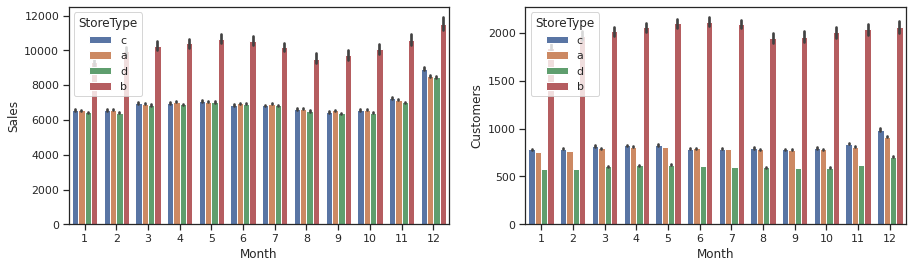

In [ ]:
# Month
# Looking at the Sales and Customer of each store type per month

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Month', y='Sales',hue='StoreType',data=train_set,order =[1,2,3,4,5,6,7,8,9,10,11,12], ax=axis1)
sns.barplot(x='Month', y='Customers',hue='StoreType',data=train_set, order=[1,2,3,4,5,6,7,8,9,10,11,12], ax=axis2)

As you can see when the store is closed ,there is no customer,when the store is open there are customers and hence a boost of sales

In [ ]:
train_set['Store'].sum()

568039744

In [ ]:
train_set['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

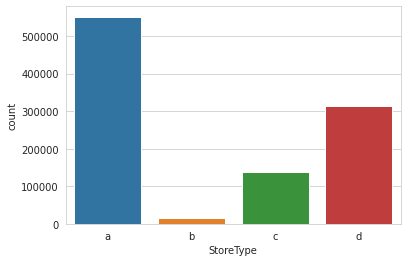

In [ ]:
sns.countplot(x='StoreType', data=train_set, order=['a','b','c','d'])

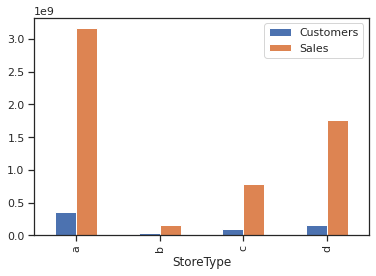

In [ ]:
# look at different levels of StoreType and how the main metric Sales and customers is distributed among them.

storetype_set =train_set.groupby('StoreType')['Customers', 'Sales'].sum()
storetype_set.plot(kind = 'bar')

Trends

Comparing main metrics : customer and Sales over StoreType during a period of  month exploiting where there was promo

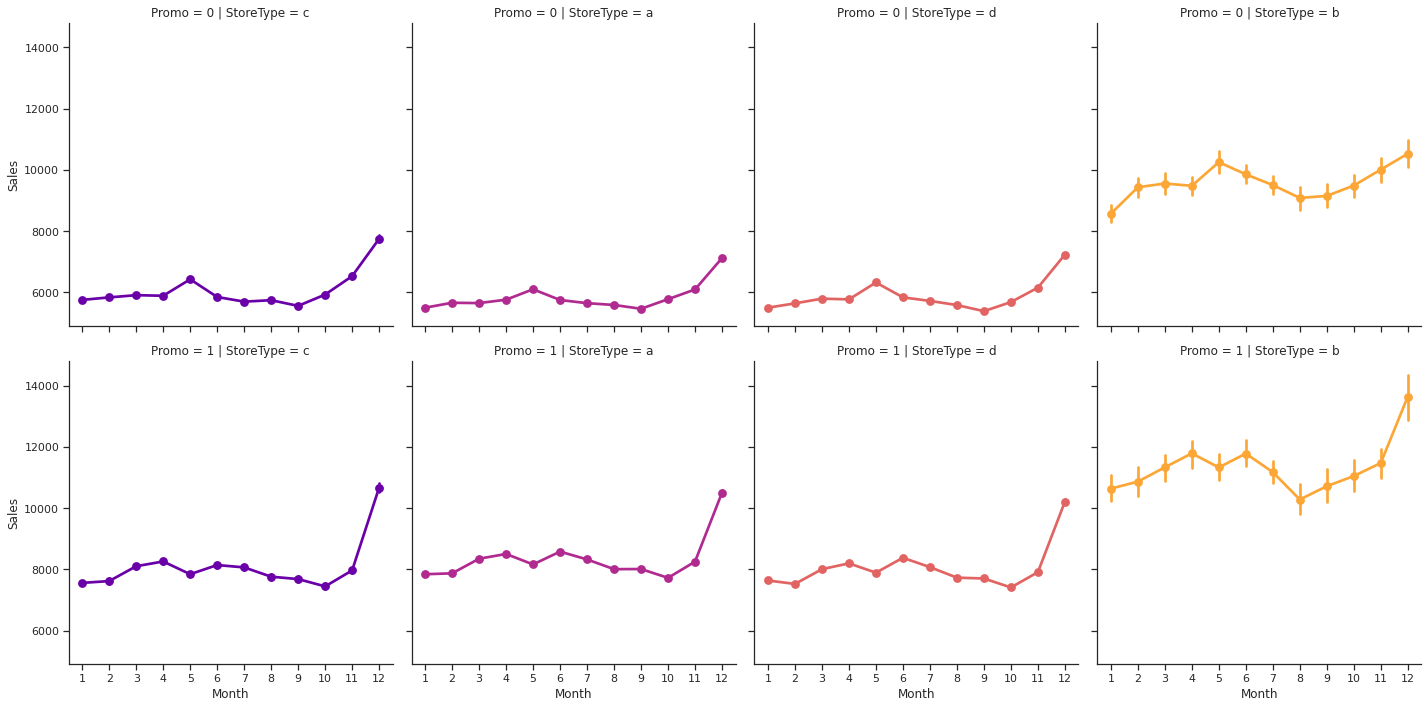

In [ ]:
# sales trends in each store 
sns.factorplot(data = train_set, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

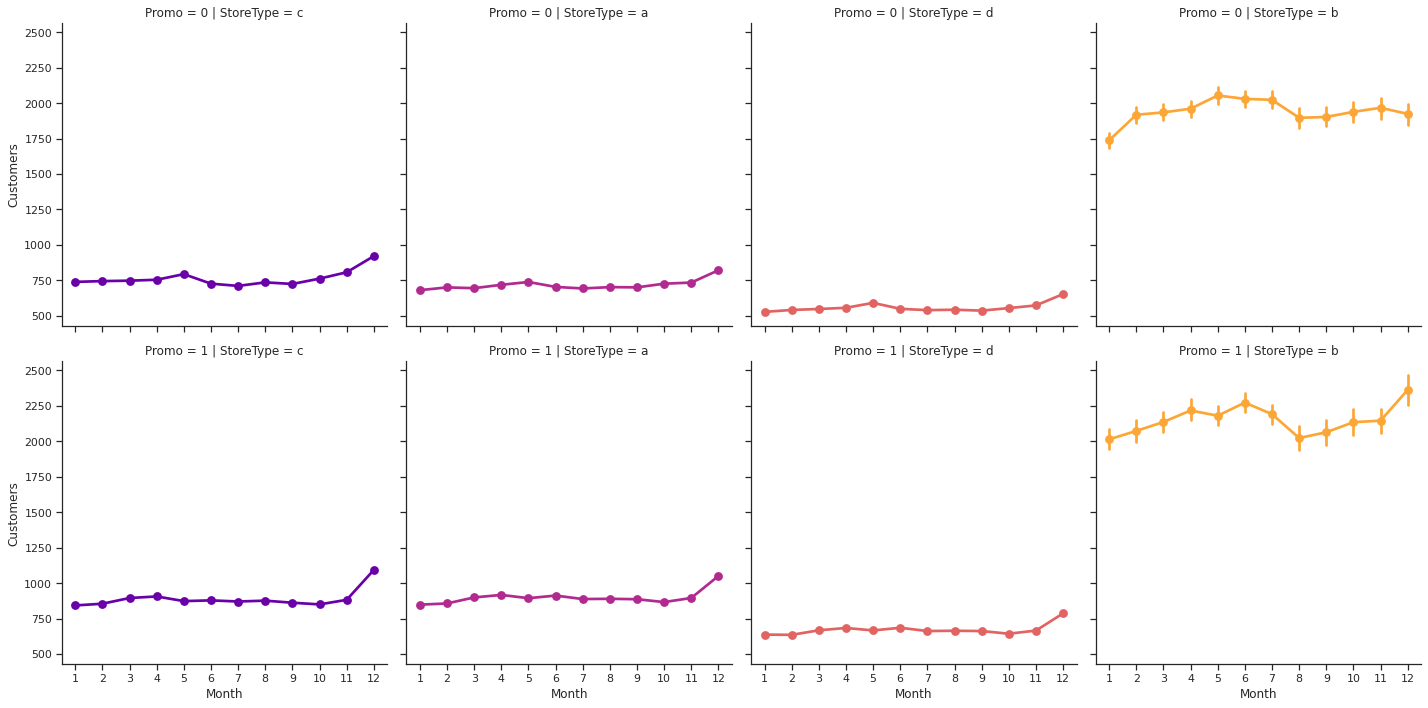

In [ ]:
# customer trends per store 
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

at this point, we can see that Sales escalate towards Christmas holidays. 

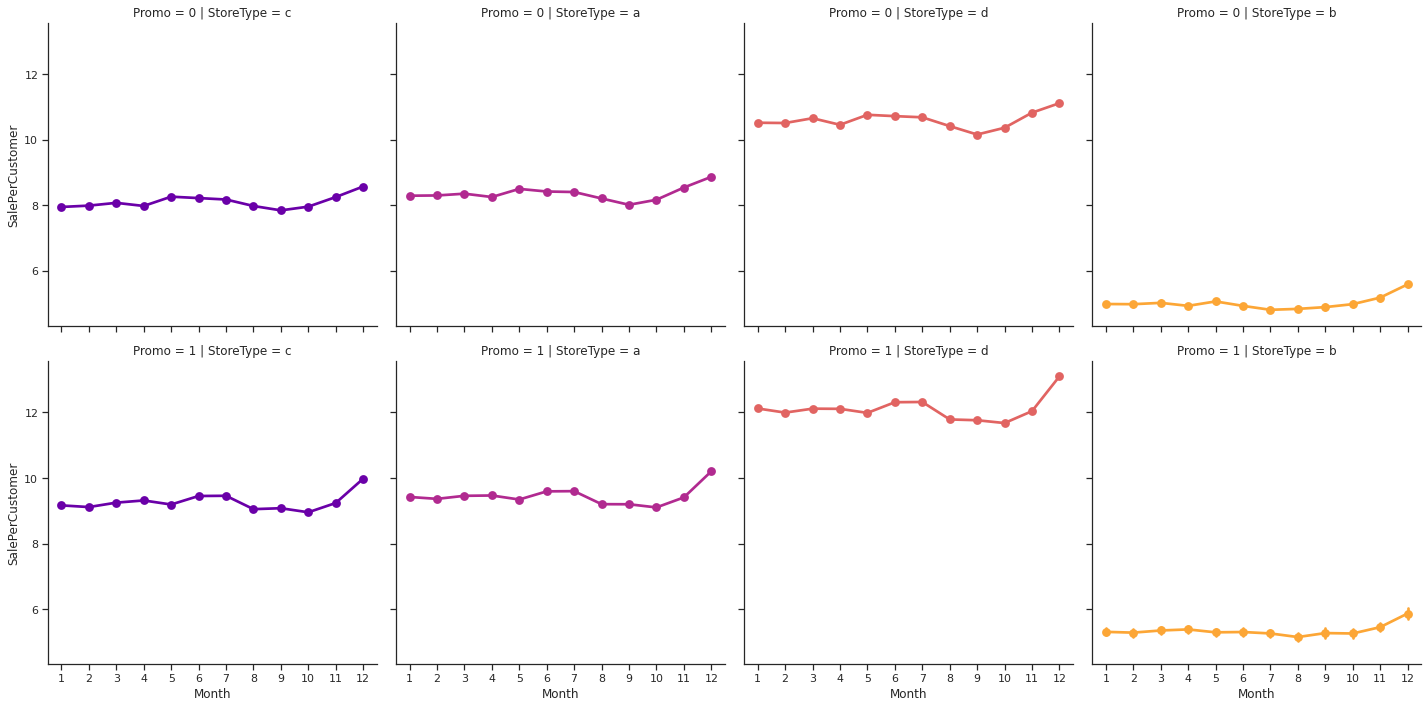

In [ ]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

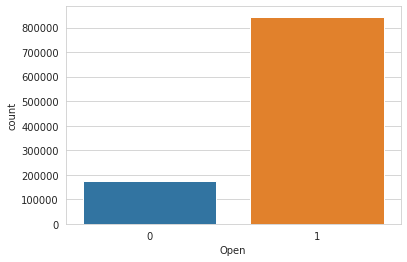

In [ ]:
sns.countplot(x='Open', data=train_set, order=[0,1])

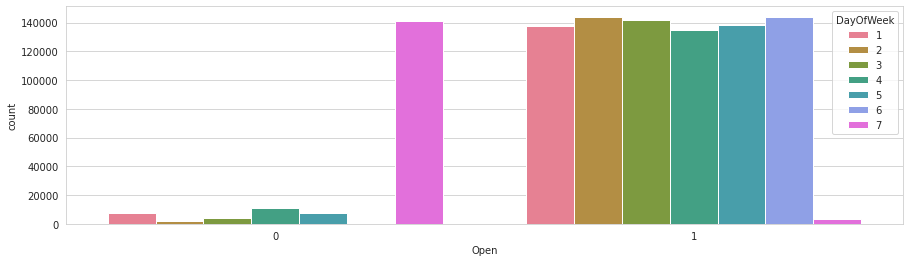

In [ ]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open', hue='DayOfWeek', data=train_set,palette="husl", ax=axis1)


during most days of the week ,other than the 7th day,the stores are open

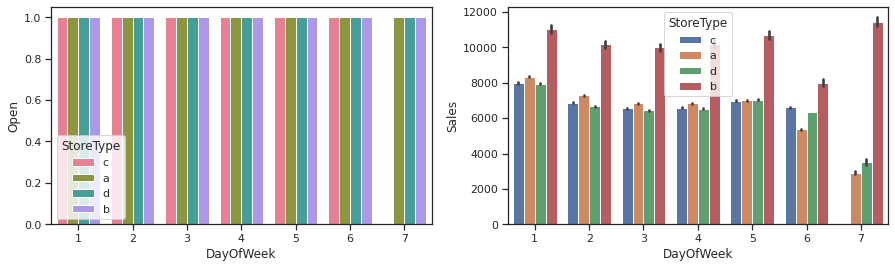

In [ ]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Open', hue ='StoreType', data=train_set,palette="husl", order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Sales', hue = 'StoreType',data=train_set, order=[1,2,3,4,5,6,7], ax=axis2)

Which stores are opened on all weekdays?
All stores are open during weekdays: a ,b,c,d

as you can see store c is not opened on Day 7

 How does that affect their sales on weekends? 
 Affects their sales ,in that the more they open ,the more the sales and by weekend most of the store retailers who operate the sales are tired by weekend .Opening every day affects their productivity during the weekends

 Promo

In [ ]:
train['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

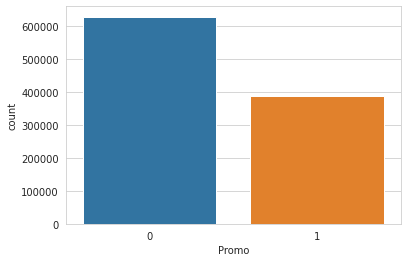

In [ ]:
sns.countplot(x='Promo', data=train_set, order=[0,1])

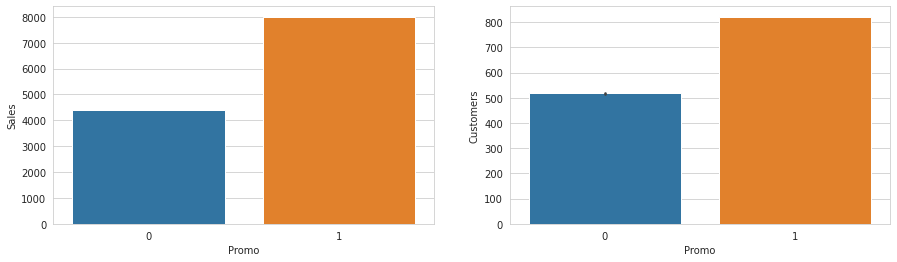

In [ ]:
# Promo

# Plot average sales & customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
#plt.legend()

sns.barplot(x='Promo', y='Sales', data=train, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=train, ax=axis2)

Could the promos be deployed in more effective ways?

Yes they could be deployed in more effective ways to increase sales

As you can see the promos affect sales and customers.Promos attract more customers hence boost sales making sales increase.

How does it affect already existing customers?

It makes the number of customers increase.

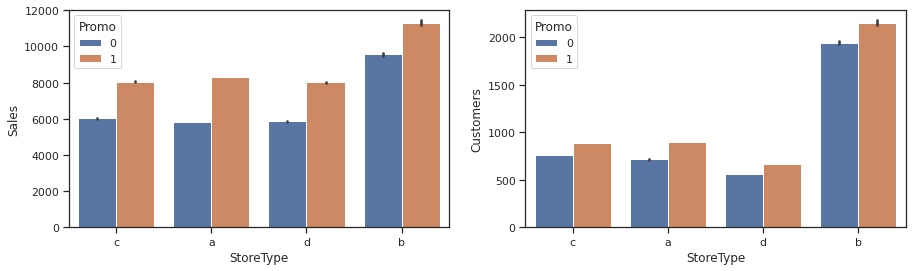

In [ ]:
# Promo

# Plot a sales & customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
#plt.legend()

sns.barplot(x='StoreType', y='Sales',hue ='Promo', data=train_set, ax=axis1)
sns.barplot(x='StoreType', y='Customers', hue = 'Promo', data=train_set, ax=axis2)

The main of aim of conducting a promotion campaign is to boost sales and gain new clientelle(customers).

As you can see promos need to deployed in stores c,a,d respectively.

In these StoreTypes , promos need to be deployed to enable them to increase customers and hence it will boost the sales.
The more the customers the more they buy and then sales will increase


 Assortment type affecting sales





In [ ]:
train_set = pd.merge(train,store_set,on ='Store')

In [ ]:
train_set['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

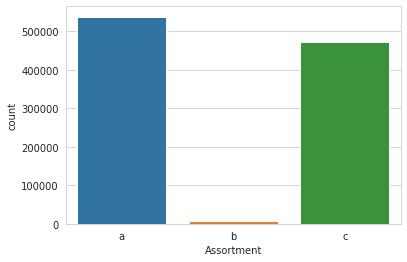

In [ ]:
sns.countplot(x='Assortment', data=train_set, order=['a','b','c'])

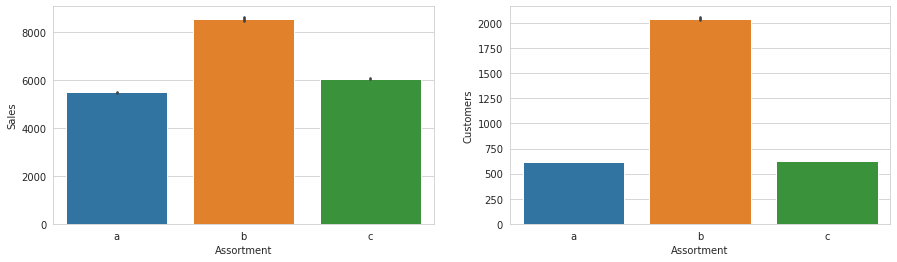

In [ ]:
# Assortment 

# Plot Assortment, & Assortment Vs average sales and customers

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=train_set, order=['a','b','c'], ax=axis1,)
sns.barplot(x='Assortment', y='Customers', data=train_set, order=['a','b','c'], ax=axis2)

As you can see assortment type affects sales and customers.
Assortment Type b is prefered  by customers  more than type a.Hence assortment Type b is sold most

 Competition distance

In [ ]:
train_set["CompetitionDistance"].value_counts()

250.0      11120
50.0        7536
350.0       7536
1200.0      7374
190.0       7352
           ...  
13020.0      758
24770.0      758
10170.0      758
12870.0      758
8190.0       758
Name: CompetitionDistance, Length: 654, dtype: int64

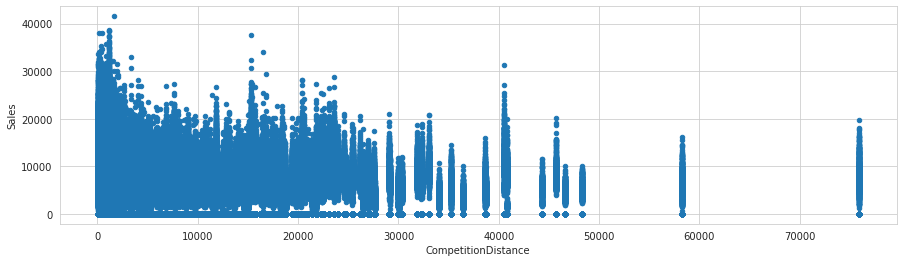

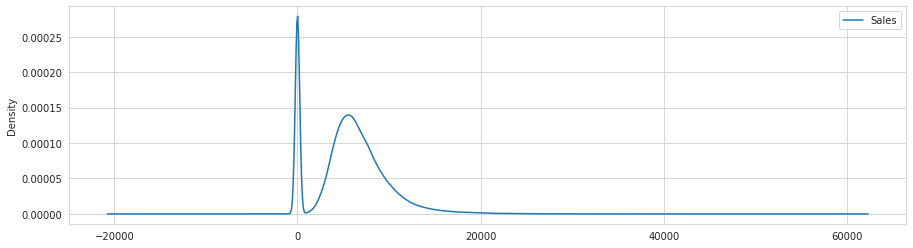

In [ ]:
# CompetitionDistance

# fill NaN values
train_set["CompetitionDistance"].fillna(train_set["CompetitionDistance"].median())

# Plot CompetitionDistance Vs Sales
train_set.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
train_set.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

In the first plot, you can see sales is relatively high where the competition distance is  0 and between 0 and 20000 the sales is fairly distributed.

In the second plot you can see sales is  high where the competition distance  is close to 0 and relatively fair between 0 and 20000 competition distance.

 What if the store and its competitors all happen to be in city centres, does the distance matter in that case?
 
> No the distance does not matter if the stores and its competitors located in City center,it is assumed that is in the City center sales are fairly distributed in the city center(whre competition distance is close to 0) and this may be attributed by the igh population density and traffic in the city centers.




Competition Open

In [ ]:
# competition open time (in months)
train_set['CompetitionOpen'] = 12 * (train_set.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_set['PromoOpen'] = 12 * (train_set.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_set.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()


,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.